# __Analyze__ my morning <font color=green>wake-up time</font> of _5 months_

In [2]:
# required modules.

import pandas as pd
import numpy as np
from datetime import datetime as dt

### Load all the data.

In [3]:
# for sep to nov month
wake_up_3_mon = pd.read_csv('./Times_data/times_sep_oct_nov.csv')
dates_3_mon     = pd.read_csv('./Dates_data/dates_sep_oct_nov.csv')

# for april
wake_up_april = pd.read_csv('./Times_data/times_april.txt')
dates_april   = pd.read_csv('./Dates_data/dates_april.csv')

#for may
wake_up_june   = pd.read_csv('./Times_data/times_june.txt')
dates_june     = pd.read_csv('./Dates_data/dates_june.csv')

### Preview all loaded data as DataFrame.

In [4]:
dates_3_mon.head()

,dates,days,month
0,01-09-2020,Tue,Sep
1,02-09-2020,Wed,Sep
2,03-09-2020,Thu,Sep
3,04-09-2020,Fri,Sep
4,05-09-2020,Sat,Sep


In [5]:
dates_april.head()

,dates,days,month
0,01-04-2020,Wed,Apr
1,02-04-2020,Thu,Apr
2,03-04-2020,Fri,Apr
3,04-04-2020,Sat,Apr
4,05-04-2020,Sun,Apr


In [6]:
dates_june.head()

,dates,days,month
0,01-06-2020,Mon,Jun
1,02-06-2020,Tue,Jun
2,03-06-2020,Wed,Jun
3,04-06-2020,Thu,Jun
4,05-06-2020,Fri,Jun


In [7]:
wake_up_3_mon.head()

,wake_up_time
0,''
1,''
2,820
3,740
4,630


In [8]:
wake_up_april.head()

,wake_up_time
0,''
1,400
2,800
3,730
4,415


In [9]:
wake_up_june.head()

,wake_up_time
0,''
1,''
2,445
3,445
4,851


### Concat all dates and times data into <font color=green> one</font> respectively.

In [10]:
dates_mon = pd.concat( [ dates_april , dates_june , dates_3_mon] ).reset_index()
wake_up   = pd.concat( [ wake_up_april , wake_up_june , wake_up_3_mon ]).reset_index()

In [11]:
if dates_mon.shape[0] == wake_up.shape[0]: print('Both contains same no.of rows.')

Both contains same no.of rows.


In [12]:
# 5 months data are concatinated
dates_mon.shape[0] , wake_up.shape[0]

(151, 151)

***

# Making a <font color=green>valid</font> time series

### __Replace__ <font color=red>empty</font> data with NaN in wake up times

In [13]:
# values contains only digits
only_digit_filt = wake_up['wake_up_time'].apply( lambda x: x.isdigit() )

In [14]:
# inverse the filter and assing NaN to each
wake_up[ ~only_digit_filt ] = np.nan 

In [15]:
# No ':' colon in wake_up
wake_up.head()

,index,wake_up_time
0,NaN,NaN
1,1.0,400
2,2.0,800
3,3.0,730
4,4.0,415


### <font color=green> Adding  </font>colon (' __:__ ') b/w numbers and ('__:00__') in the end to make a _valid time format_

In [16]:
def adding_colon(data):
    '''Adding colon in str like this 3:40:00 04:40:00 '''
    
    if isinstance(data,str):
        data_list = list(data)
        if len( data_list ) == 4:
            data_list.insert(2,':')
        else:
            data_list.insert(1,':')
        return (''.join(data_list) ) + ':00' # format 00:00:00

In [17]:
wake_up['wake_up_time'] = wake_up['wake_up_time'].apply(adding_colon)

In [18]:
wake_up.tail(5)

,index,wake_up_time
146,86.0,5:00:00
147,87.0,5:15:00
148,88.0,6:00:00
149,89.0,6:15:00
150,90.0,6:00:00


### Combine dates with wake_up time as __Calender__ 

In [19]:
dates_mon['wake_up_time'] = wake_up['wake_up_time']

In [20]:
dates_mon.drop(columns='index',inplace=True)

### <font color=green> Required DataFrame </font> on which we starts analyzing

In [21]:
dates_mon.head()

,dates,days,month,wake_up_time
0,01-04-2020,Wed,Apr,None
1,02-04-2020,Thu,Apr,4:00:00
2,03-04-2020,Fri,Apr,8:00:00
3,04-04-2020,Sat,Apr,7:30:00
4,05-04-2020,Sun,Apr,4:15:00


### Convert <font color=green> wake_up_time columns</font> <font color=orange> into</font> <font color=green> datetime object </font> for time comparision

In [22]:
def str_to_time(str_time):
    '''Convert string into datetime object'''
    
    if isinstance(str_time,str):
        return dt.strptime( str_time , '%H:%M:%S').strftime('%H:%M:%S')
    else:
        return np.nan

In [23]:
# re-assign the returned series
dates_mon['wake_up_time'] = dates_mon['wake_up_time'].dropna().apply(str_to_time) # dropna() don't disturb main index

In [24]:
dates_mon.head()

,dates,days,month,wake_up_time
0,01-04-2020,Wed,Apr,NaN
1,02-04-2020,Thu,Apr,04:00:00
2,03-04-2020,Fri,Apr,08:00:00
3,04-04-2020,Sat,Apr,07:30:00
4,05-04-2020,Sun,Apr,04:15:00


***

# An <font color=green> Custom-Algorithm </font> which decides my wake up time <font color=green> performance </font>
### __5:30AM - 6:30AM__ - <font color=green>Average</font> __,__ __Before 5:30AM__ - <font color=green>Excellent</font> __,__ __After 6:30AM__    - <font color=green>Lazy</font>


In [25]:
first_time  = str_to_time('5:30:00')
second_time = str_to_time('6:30:00')

def performance_check( timing ):
    if timing <= first_time:
        return 'Excellent'
    elif timing > first_time and timing <= second_time:
        return 'Average'
    else:
        return 'Lazy'

In [26]:
# creates new column for performance
dates_mon['performance'] = dates_mon['wake_up_time'].dropna().apply( performance_check )

In [27]:
dates_mon.head()

,dates,days,month,wake_up_time,performance
0,01-04-2020,Wed,Apr,NaN,NaN
1,02-04-2020,Thu,Apr,04:00:00,Excellent
2,03-04-2020,Fri,Apr,08:00:00,Lazy
3,04-04-2020,Sat,Apr,07:30:00,Lazy
4,05-04-2020,Sun,Apr,04:15:00,Excellent


In [28]:
# Capitalize columns name
dates_mon.columns = dates_mon.columns.str.capitalize()

In [29]:
dates_mon.head()

,Dates,Days,Month,Wake_up_time,Performance
0,01-04-2020,Wed,Apr,NaN,NaN
1,02-04-2020,Thu,Apr,04:00:00,Excellent
2,03-04-2020,Fri,Apr,08:00:00,Lazy
3,04-04-2020,Sat,Apr,07:30:00,Lazy
4,05-04-2020,Sun,Apr,04:15:00,Excellent


***

# __Re-arranging__ the data for <font color=green>Graph</font>

## Grouping by months

In [30]:
dates_mon_grp = dates_mon.groupby('Month')['Performance']\
                                            .value_counts()\
                                            .unstack()

In [31]:
dates_mon_grp.index

Index(['Apr', 'Jun', 'Nov', 'Oct', 'Sep'], dtype='object', name='Month')

In [32]:
# re-arrange the rows
dates_mon_grp.index = ['Arp','Jun','Sep','Oct','Nov']

### <font color=green> Expected </font> Dataframe For __Graph__

In [33]:
dates_mon_grp

Performance,Average,Excellent,Lazy
Arp,5,8,16
Jun,3,5,18
Sep,9,17,4
Oct,3,23,5
Nov,10,8,10


In [34]:
# rename the columns name
dates_mon_grp.columns = [ '5:30AM-6:30AM','Before 5:30AM','After 6:30AM']

In [35]:
dates_mon_grp

,5:30AM-6:30AM,Before 5:30AM,After 6:30AM
Arp,5,8,16
Jun,3,5,18
Sep,9,17,4
Oct,3,23,5
Nov,10,8,10


AttributeError: 'Rectangle' object has no property 'lines'

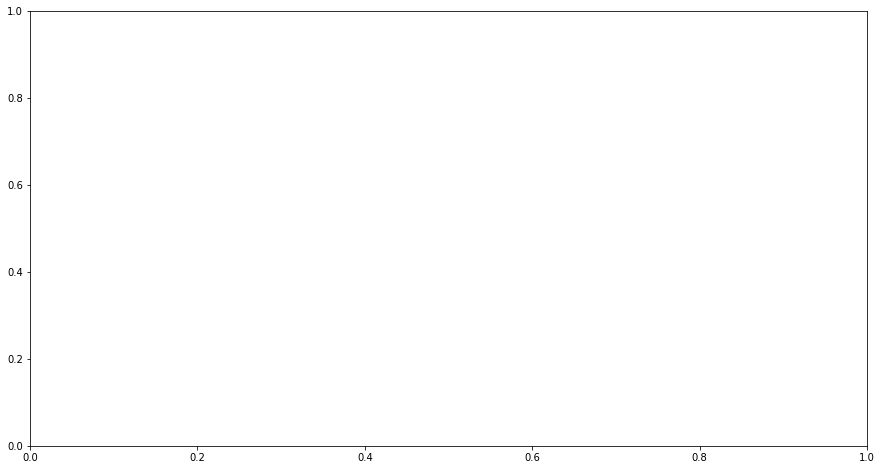

In [39]:
# Clean code principles
all_colors = ['gold','lightgreen','red']

dates_mon_grp.plot(kind    = 'bar',
                   color   = all_colors,
                   figsize = (15,8),
                   xlabel  = '\nMonth',
                   ylabel  = 'No.Of Days',
                   lines = 2
                )

# Graph which shows __Shubhanshu's__ 5 months <font color=green> Morning-Wake-Up</font> <font color=red> Performance </font>